TASK 1: TITANIC SURVIVAL PREDICTION

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [3]:
titanic_data = pd.read_csv(r'C:\Users\Darshit\OneDrive\Desktop\CODSOFT\Task 1\Titanic-Dataset.csv')

In [4]:
def analysis(data):
    print(f'Titanic Data Size  : {data.size}')
    print(f'\nShape of the dataframe: {data.shape[0]} rows and {data.shape[1]} columns')
    print("*" * 100)
    print(f'\nMissing values in each column: \n{data.isnull().sum()} ')
    print(f'\nTotal missing values in the dataframe: {data.isnull().sum().sum()} ')
    print("*" * 100)
    print("\nGlimpse of the dataframe:")
    display(data.head())
    print("*" * 100)
    print("\nStatistical measures about the data:")
    display(data.describe())
    print("*" * 100)
    print("\nSome important information about the dataframe:\n")
    display(data.info())
    print("*" * 110)
    
data = titanic_data
analysis(titanic_data)

Titanic Data Size  : 10692

Shape of the dataframe: 891 rows and 12 columns
****************************************************************************************************

Missing values in each column: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Total missing values in the dataframe: 866 
****************************************************************************************************

Glimpse of the dataframe:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


****************************************************************************************************

Statistical measures about the data:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


****************************************************************************************************

Some important information about the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

**************************************************************************************************************


In [5]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(titanic_data)

,Missing_Number,Missing_Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


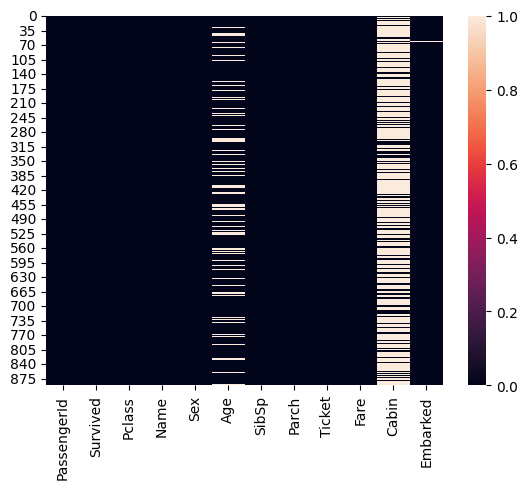

In [6]:
sns.heatmap(titanic_data.isnull());

In [7]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [8]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [9]:
print(titanic_data['Fare'].mean())

32.204207968574636


In [10]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

In [13]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [14]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df = titanic_data[['Survived','Pclass','Sex','Age','SibSp', 'Parch','Fare','Embarked']]

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


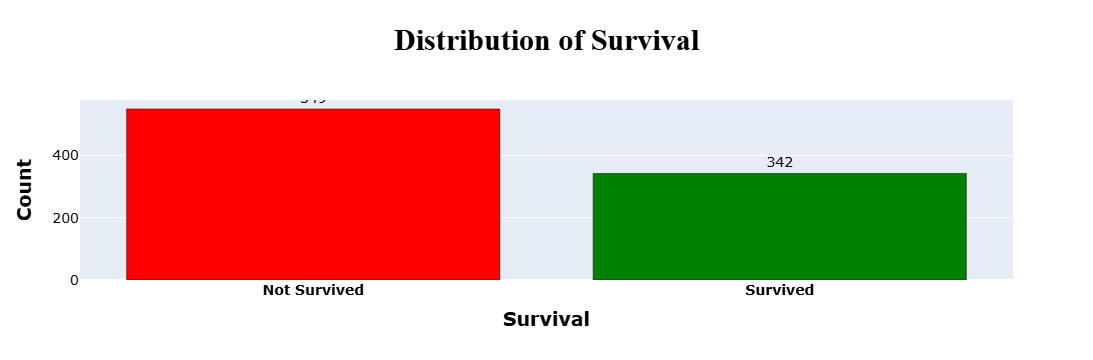

In [20]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['Survived'].value_counts().index,
    y=df['Survived'].value_counts(),
    marker_color=['Red','Green'],marker_line=dict(width=0.5, color='black'),
    text=df['Survived'].value_counts(),
    textfont=dict(size=14,color="black"),textposition='outside',
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['<b>Not Survived</b>', '<b>Survived</b>'], tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14)
                 
fig.update_layout(
    title='<b>Distribution of Survival</b>',title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    xaxis=dict(title='<b>Survival</b>',title_font=dict(size=19)),
    yaxis=dict(title='<b>Count</b>',title_font=dict(size=19), color='black'),
    title_x=0.5,
)

fig.show() 

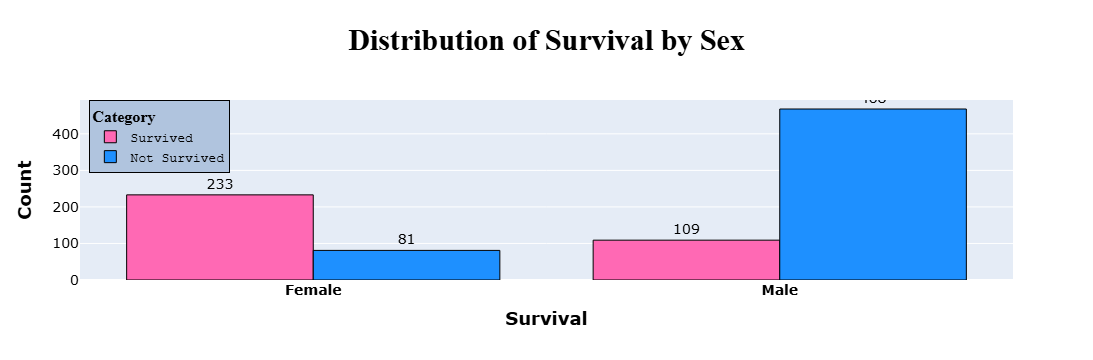

In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df.groupby(['Sex', 'Survived']).size().unstack().index,
    y=df.groupby(['Sex', 'Survived']).size().unstack()[1],  
    text=df.groupby(['Sex', 'Survived']).size().unstack()[1],
    textposition='outside',
    textfont=dict(size=14,color="black"),
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Survived',
    name='Survived',
    marker_color='hotpink', marker_line=dict(width=1, color='black'),
))

fig.add_trace(go.Bar(
    x=df.groupby(['Sex', 'Survived']).size().unstack().index,
    y=df.groupby(['Sex', 'Survived']).size().unstack()[0],  
    text=df.groupby(['Sex', 'Survived']).size().unstack()[0],
    textposition='outside',
    textfont=dict(size=14,color="black"),
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Not Survived',
    name='Not Survived',
    marker_color='dodgerblue', marker_line=dict(width=1, color='black'),
))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['<b>Female</b>', '<b>Male</b>'], tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14)
    
fig.update_layout(
    title='<b>Distribution of Survival by Sex</b>',title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    xaxis=dict(title='<b>Survival</b>', title_font=dict(size=18)),
    yaxis=dict(title='<b>Count</b>', title_font=dict(size=18),color='black'),
    title_x=0.5,
    barmode='group',  
  
    legend=dict(title='<b>Category</b>', x=0.01, y=1, title_font_family="Times New Roman", font=dict(family="Courier",
            size=13, color="black"), bgcolor="LightSteelBlue", bordercolor="Black", borderwidth=1)
)

fig.show()

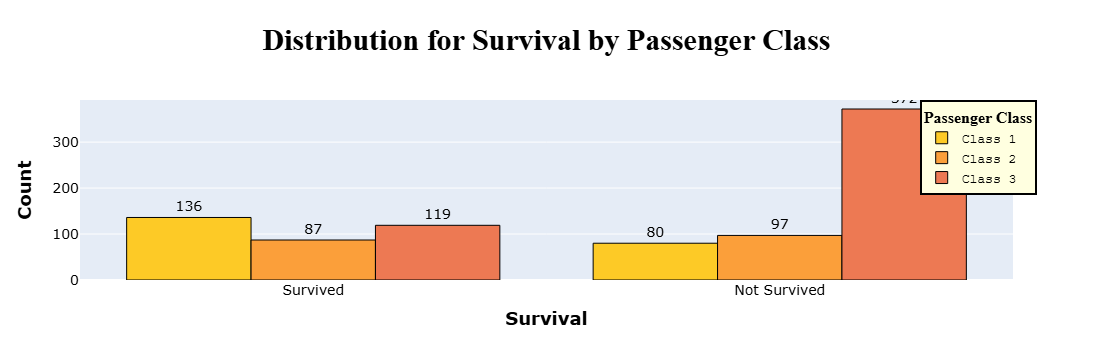

In [22]:
fig = go.Figure()

class_colors = {1: '#fdca26', 2: '#fb9f3a', 3: '#ed7953'}

for pclass in [1, 2, 3]:
    filtered_df = df[df['Pclass'] == pclass]
    
    fig.add_trace(go.Bar(
        x=filtered_df['Survived'].value_counts().index.map({0: 'Not Survived', 1: 'Survived'}),
        y=filtered_df['Survived'].value_counts(),
        text=filtered_df['Survived'].value_counts(),
        textposition='outside',
        textfont=dict(size=14,color="black"),
        hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
        marker_color=class_colors[pclass], marker_line=dict(width=1, color='black'),
        name=f'Class {pclass}'
    ))

fig.update_xaxes(type='category', tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14)

fig.update_layout(
    title='<b>Distribution for Survival by Passenger Class</b>',title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    xaxis=dict(title='<b>Survival</b>', title_font=dict(size=18)),
    yaxis=dict(title='<b>Count</b>', title_font=dict(size=18),color='black'),
    title_x=0.5,
    barmode='group',
    legend=dict(title='<b>Passenger Class</b>', x=0.9, y=1, title_font_family="Times New Roman", font=dict(family="Courier",
            size=13, color="black"), bgcolor="lightyellow", bordercolor="Black", borderwidth=2),
)

fig.show()

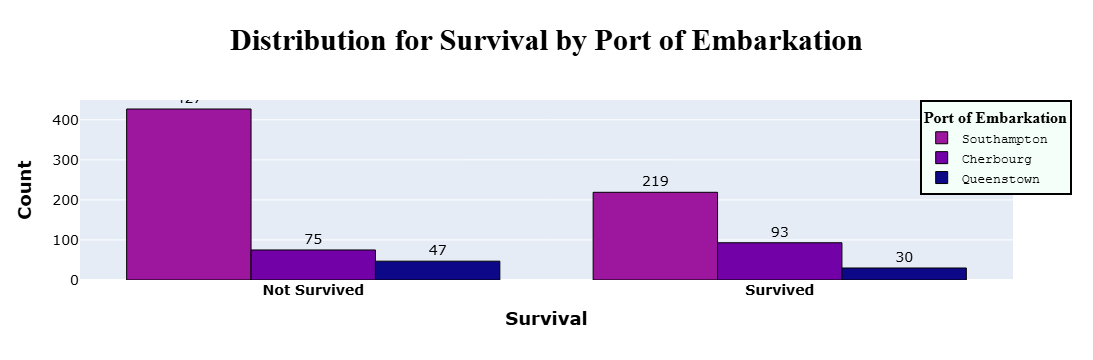

In [23]:
fig = go.Figure()

embarked_colors = {'S': '#9c179e', 'C': '#7201a8', 'Q': '#0d0887'}
embarked_labels = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

for embarked in ['S', 'C', 'Q']:
    filtered_df = df[df['Embarked'] == embarked]
    
    fig.add_trace(go.Bar(
        x=filtered_df['Survived'].value_counts().index.map({0: 'Not Survived', 1: 'Survived'}),
        y=filtered_df['Survived'].value_counts(),
        text=filtered_df['Survived'].value_counts(),
        textposition='outside',
        textfont=dict(size=14,color="black"),
        hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
        marker_color=embarked_colors[embarked], marker_line=dict(width=1, color='black'),
        name=f'{embarked_labels[embarked]}'
    ))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['<b>Not Survived</b>', '<b>Survived</b>'], tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14)

fig.update_layout(
    title='<b>Distribution for Survival by Port of Embarkation</b>',title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    xaxis=dict(title='<b>Survival</b>', title_font=dict(size=18)),
    yaxis=dict(title='<b>Count</b>', title_font=dict(size=18), color='black'),
    title_x=0.5,
    barmode='group',
    legend=dict(title='<b>Port of Embarkation</b>', x=0.9, y=1, title_font_family="Times New Roman", font=dict(family="Courier",
            size=13, color="black"), bgcolor="mintcream", bordercolor="Black", borderwidth=2),
)

fig.show()


In [24]:
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Object columns in the dataframe: ['Sex', 'Embarked']


In [25]:
for i in num_list:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in Survived column are: 2
No. of unique values in Pclass column are: 3
No. of unique values in Age column are: 88
No. of unique values in SibSp column are: 7
No. of unique values in Parch column are: 7
No. of unique values in Fare column are: 248


In [26]:
for i in obj_list:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in Sex column are: 2
No. of unique values in Embarked column are: 3


In [27]:
cat_col=[]
print("Unique values in each column are - ")
print()
for col in df.columns:
    if df[col].nunique()<=10:
        print(f'{col}: {df[col].unique()}')
        cat_col.append(col)

Unique values in each column are - 

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q']


In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
df = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex','Embarked']]
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,male,S
1,1,1,38.0,1,0,71.2833,female,C
2,1,3,26.0,0,0,7.9250,female,S
3,1,1,35.0,1,0,53.1000,female,S
4,0,3,35.0,0,0,8.0500,male,S


In [30]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [31]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [32]:
print(df)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print('\nTitanic dataset after converting all values to numerical ones: \n',df)

     Survived  Pclass   Age  SibSp  Parch     Fare     Sex Embarked
0           0       3  22.0      1      0   7.2500    male        S
1           1       1  38.0      1      0  71.2833  female        C
2           1       3  26.0      0      0   7.9250  female        S
3           1       1  35.0      1      0  53.1000  female        S
4           0       3  35.0      0      0   8.0500    male        S
..        ...     ...   ...    ...    ...      ...     ...      ...
886         0       2  27.0      0      0  13.0000    male        S
887         1       1  19.0      0      0  30.0000  female        S
888         0       3  28.0      1      2  23.4500  female        S
889         1       1  26.0      0      0  30.0000    male        C
890         0       3  32.0      0      0   7.7500    male        Q

[891 rows x 8 columns]

Titanic dataset after converting all values to numerical ones: 
      Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0           0     

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(' \nTitanic dataset after standarizing the data: \n' , df)

 
Titanic dataset after standarizing the data: 
      Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0           0       3 -0.564145      1      0 -0.498948      True       False   
1           1       1  0.664649      1      0  0.789405     False       False   
2           1       3 -0.256947      0      0 -0.498948     False       False   
3           1       1  0.434250      1      0  0.427056     False       False   
4           0       3  0.434250      0      0 -0.478817      True       False   
..        ...     ...       ...    ...    ...       ...       ...         ...   
886         0       2 -0.180147      0      0 -0.378164      True       False   
887         1       1 -0.794544      0      0 -0.035946     False       False   
888         0       3 -0.103348      1      2 -0.176859     False       False   
889         1       1 -0.256947      0      0 -0.035946      True       False   
890         0       3  0.203851      0      0 -0.498948     

In [35]:
df['Survived'] = df['Survived'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

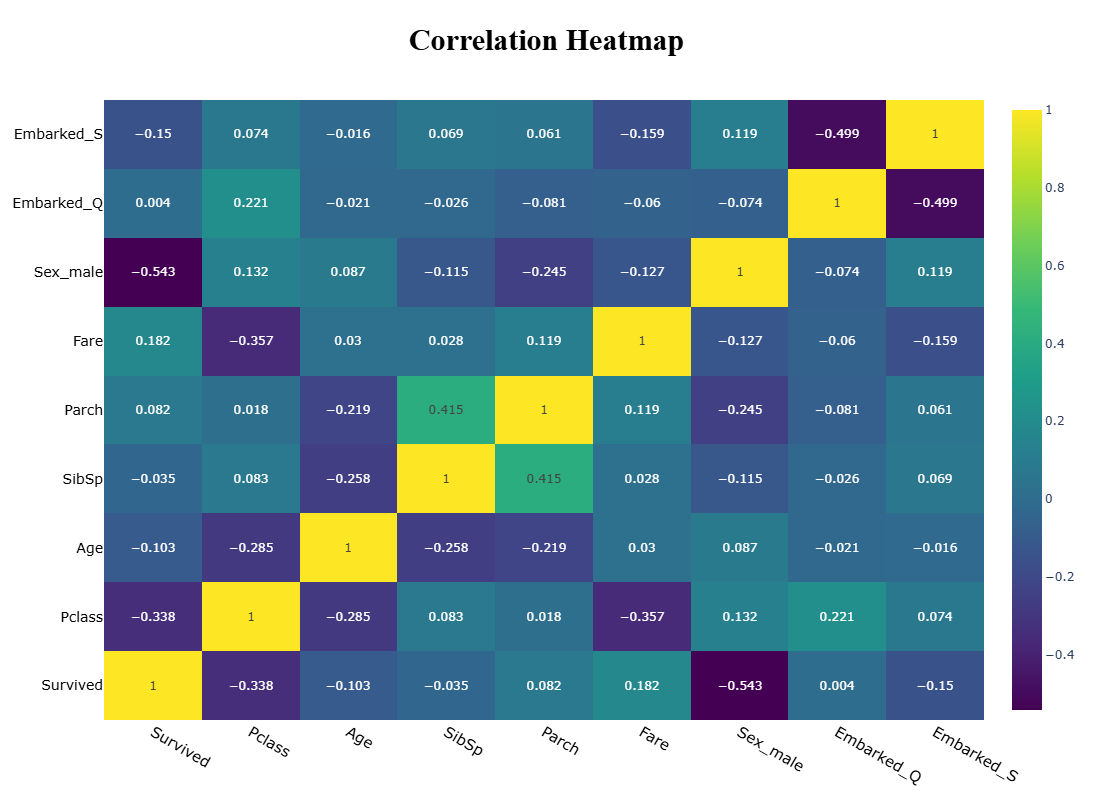

In [36]:
corr_matrix = df.corr()
corr_matrix_round = corr_matrix.round(3)
fig = go.Figure(data=go.Heatmap(
                z=np.array(corr_matrix_round),
                x=corr_matrix.columns,
                y=corr_matrix.index,
                colorscale = 'viridis',
                texttemplate="%{z}"
                
))

fig.update_xaxes(tickfont_size=15, color ='black')
fig.update_yaxes(tickfont_size=14, color ='black')

fig.update_layout(
    title="<b>Correlation Heatmap</b>",title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    title_x=0.5, 
   )
fig.layout.height = 800
fig.layout.width = 800

fig.show()

In [37]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [38]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0,1,0,0,True,False,True
1,1,0,1,0,0,False,False,False
2,3,0,0,0,0,False,False,True
3,1,0,1,0,0,False,False,True
4,3,0,0,0,0,True,False,True


In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
from sklearn.feature_selection import mutual_info_classif
info_gain = mutual_info_classif(X, y, discrete_features=[1, 2, 3, 4, 5, 6, 7])

In [41]:
print("\nInformation Gain for Each Feature:")
print(dict(zip(X.columns, info_gain)))


Information Gain for Each Feature:
{'Pclass': np.float64(0.029492138559013448), 'Age': np.float64(0.00963717161036775), 'SibSp': np.float64(0.02319708627963908), 'Parch': np.float64(0.016365584523616174), 'Fare': np.float64(0.028992414667499185), 'Sex_male': np.float64(0.15087048925218183), 'Embarked_Q': np.float64(6.651420415212939e-06), 'Embarked_S': np.float64(0.011027556713837844)}


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


In [44]:
logistic = LogisticRegression()
lr = logistic.fit(X_train, y_train)
y_pred_lr = logistic.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

dtree = DecisionTreeClassifier()
dt = dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

rfmodel = RandomForestClassifier()
rf = rfmodel.fit(X_train, y_train)
y_pred_rf = rfmodel.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

bagg = BaggingClassifier()
bg = bagg.fit(X_train, y_train)
y_pred_bg = bagg.predict(X_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

ada = AdaBoostClassifier()
ad = ada.fit(X_train, y_train)
y_pred_ad = ada.predict(X_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)

gdb = GradientBoostingClassifier()
gd = gdb.fit(X_train, y_train)
y_pred_gd = gdb.predict(X_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

xgb = XGBClassifier()
xg = xgb.fit(X_train, y_train)
y_pred_xg = xgb.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

svc = SVC()
sv = svc.fit(X_train, y_train)
y_pred_sv = svc.predict(X_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)                   
                             
knn = KNeighborsClassifier()
kn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

naive_gb = GaussianNB()
ngb = naive_gb.fit(X_train, y_train)
y_pred_ngb = naive_gb.predict(X_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb) 

naive_bn = BernoulliNB()
nbr = naive_bn.fit(X_train, y_train)
y_pred_nbr = naive_bn.predict(X_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr)

In [45]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',ad),
                                  ('gd', gd),('xg', xg),('sv', sv),('knn', knn),
                                  ('ngb', ngb),('nbr', nbr)], voting='hard')

model_evc = evc.fit(X_train, y_train)
pred_evc = evc.predict(X_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

              Method Used  Accuracy
0      LogisticRegression  0.798883
1            DecisionTree  0.793296
2            RandomForest  0.804469
3                 Bagging  0.798883
4                Adaboost  0.793296
5        GradientBoosting  0.782123
6                 XGBoost  0.815642
7           SupportVector  0.815642
8       KNearestNeighbors  0.837989
9      NaiveBayesGaussian  0.770950
10  NaiveBayesBernoullies  0.782123
11       VotingClassifier  0.810056
Axes(0.125,0.11;0.775x0.77)


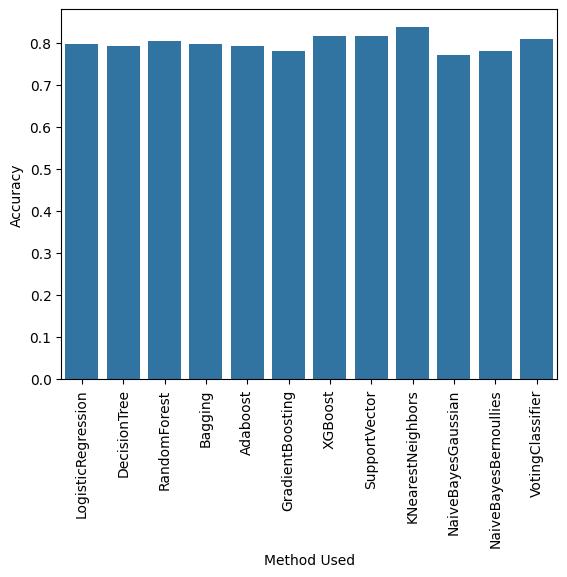

In [46]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','Adaboost',
         'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
         'NaiveBayesGaussian','NaiveBayesBernoullies','VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_ad, accuracy_gd, 
         accuracy_xg, accuracy_sv, accuracy_knn, accuracy_ngb, accuracy_nbr, accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, ada, gdb, xgb, svc, knn, naive_gb,naive_bn, evc]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [47]:
clf1 = LogisticRegression(max_iter = 15)
clf2 = DecisionTreeClassifier(criterion='entropy')
clf3 = RandomForestClassifier(n_estimators=100,criterion='entropy')
clf4 = AdaBoostClassifier()
clf5 = GradientBoostingClassifier()
clf6 = XGBClassifier()
clf7 = SVC(gamma = 'auto')
clf8 = KNeighborsClassifier()
clf9 = GaussianNB()
clf10 = BernoulliNB()

print('10-fold cross validation for all the models : \n')
for clf, label in zip([clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, evc],['Dtree','RandomForest','AdaBoost','GradientBoost','XGBoost','SVM','KNN','Naive_Bayes_Gaussian','Naive_Bayes_Bernoulli','VotingClassifier']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print(f'\n10-fold Cross Validation scores for {label}:', scores)
    print("Average Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean(), scores.std(), label))
    print("*" * 110)

10-fold cross validation for all the models : 


10-fold Cross Validation scores for Dtree: [0.79166667 0.77777778 0.71830986 0.90140845 0.81690141 0.73239437
 0.81690141 0.76056338 0.78873239 0.88732394]
Average Accuracy : 0.80 (+/-0.06)[Dtree]
**************************************************************************************************************

10-fold Cross Validation scores for RandomForest: [0.81944444 0.77777778 0.73239437 0.91549296 0.85915493 0.76056338
 0.8028169  0.70422535 0.74647887 0.91549296]
Average Accuracy : 0.80 (+/-0.07)[RandomForest]
**************************************************************************************************************

10-fold Cross Validation scores for AdaBoost: [0.84722222 0.76388889 0.71830986 0.97183099 0.87323944 0.71830986
 0.77464789 0.76056338 0.76056338 0.91549296]
Average Accuracy : 0.81 (+/-0.08)[AdaBoost]
**************************************************************************************************************

10-f

In [48]:
final_result = pd.DataFrame(sv.predict(X))
final_result = final_result.rename(columns = {0 : "Titanic_Survived_Prediction"})
final_result

,Titanic_Survived_Prediction
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [49]:
final_model = pd.concat([(titanic_data.drop(['Survived'], axis = 1)), titanic_data['Survived'], pd.DataFrame(final_result)], axis = 1)
final_model

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Titanic_Survived_Prediction
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0


In [50]:
final_model.to_csv(r"C:\Users\Darshit\OneDrive\Desktop\CODSOFT\Task 1\Titanic_Dataset_Survival_Prediction.csv")

In [51]:
print("Final Accuracy Score:",accuracy_score(final_model['Survived'], final_model['Titanic_Survived_Prediction']))

Final Accuracy Score: 0.8271604938271605
